In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
data = pd.read_csv("/content/googleplaystore.csv")

#Data Cleaning

In [60]:
data.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [61]:
data["Rating"] = data["Rating"].fillna(np.mean(data["Rating"]))

In [62]:
data.dropna(inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [64]:
#since the alingment has been wrong so we removed the row

data = data[data['App'] != 'Life Made Wi-Fi Touchscreen Photo Frame']

In [65]:
#replace the 0 with free
data['Type'] = data['Type'].replace({0: 'Free'}).fillna('Free')

In [66]:
pivot_table = pd.pivot_table(data, values="Category", index="Type",aggfunc='count')
print(pivot_table)

      Category
Type          
Free     10032
Paid       797


# Data Visualisation

<ipython-input-67-511bfe9c7a3b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Category_count.index, x=Category_count.values, palette='viridis')


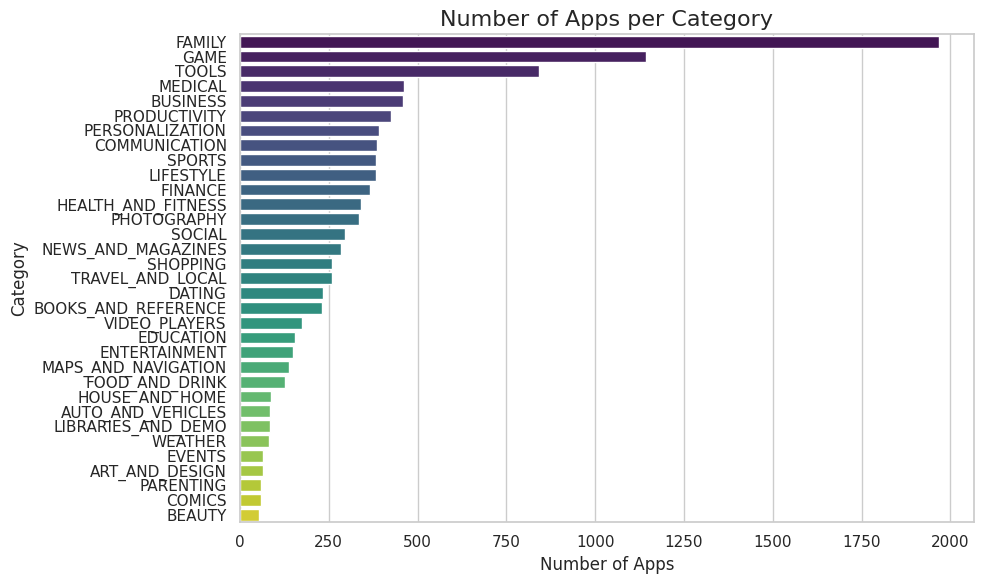

In [67]:
Category_count = data["Category"].value_counts()


# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=Category_count.index, x=Category_count.values, palette='viridis')

# Add title and labels
plt.title('Number of Apps per Category', fontsize=16)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

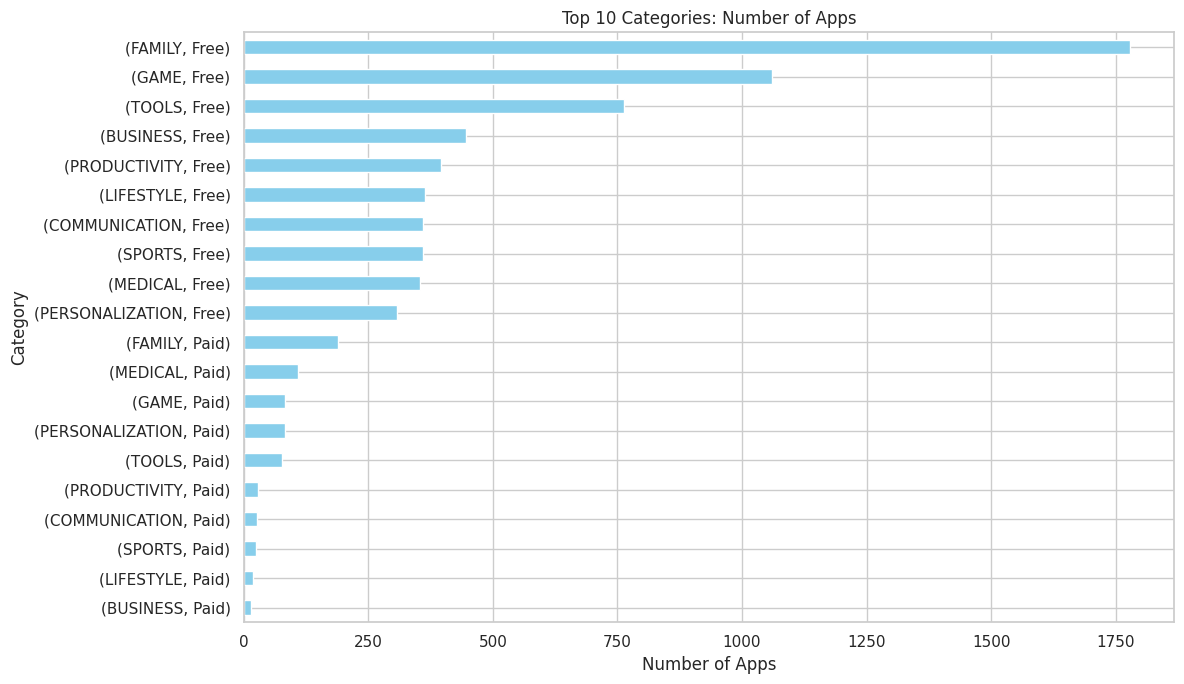

In [68]:
# Count the number of apps in each category
category_counts = data['Category'].value_counts()

# Limit the top N categories
top_n = 10
top_categories = category_counts.head(top_n)

# Create a DataFrame for the Top N categories
top_data = data[data['Category'].isin(top_categories.index)]

# Count occurrences of 'Type' and 'Content Rating' per 'Category'
pivot = top_data.groupby(['Category', 'Type', 'Content Rating']).size().unstack(fill_value=0)

# Plotting the horizontal bar plot
pivot.sum(axis=1).sort_values(ascending=True).plot(kind='barh', figsize=(12, 7), color='skyblue')

# Adding labels and title
plt.title('Top 10 Categories: Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')

# Show the plot
plt.tight_layout()
plt.show()


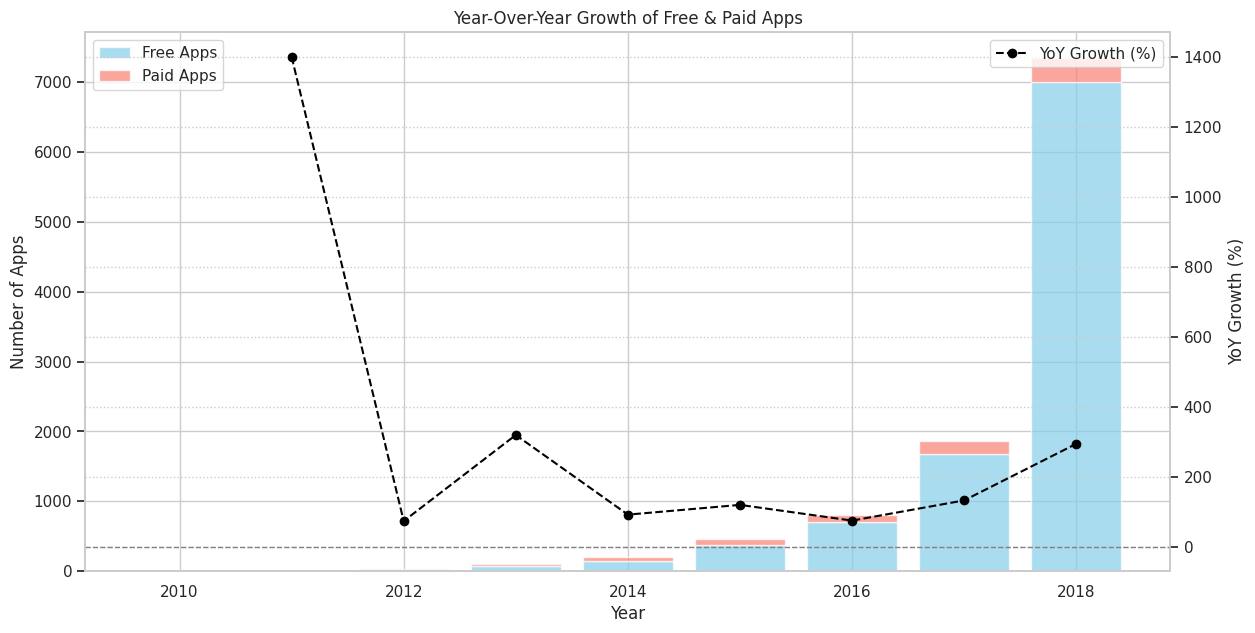

In [69]:
# Convert 'Last Updated' column to datetime and extract year
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')
data['Year'] = data['Last Updated'].dt.year

# Remove rows with missing years
data = data.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)

# Filter relevant columns
data = data[['Year', 'Type']]

# Group by year and type to count free and paid apps
yearly_data = data.groupby(['Year', 'Type']).size().unstack(fill_value=0)

# Calculate Year-over-Year (YoY) Growth
yearly_data['Total'] = yearly_data.sum(axis=1)
yearly_data['YoY Growth (%)'] = yearly_data['Total'].pct_change() * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Stacked bar chart for free & paid apps
ax1.bar(yearly_data.index, yearly_data['Free'], label='Free Apps', color='skyblue', alpha=0.7)
ax1.bar(yearly_data.index, yearly_data['Paid'], bottom=yearly_data['Free'], label='Paid Apps', color='salmon', alpha=0.7)
ax1.set_ylabel("Number of Apps")
ax1.set_xlabel("Year")
ax1.set_title("Year-Over-Year Growth of Free & Paid Apps")

# Second y-axis for YoY Growth %
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['YoY Growth (%)'], color='black', linestyle='dashed', marker='o', label="YoY Growth (%)")
ax2.set_ylabel("YoY Growth (%)")
ax2.axhline(0, color='gray', linestyle='dashed', linewidth=1)  # Baseline at 0%

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='dotted')
plt.show()